In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
dataframe = pd.read_csv('/content/drive/MyDrive/HousePricePrediction.xlsx - Sheet1.csv')
print(dataframe.head())

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [64]:
dataframe.shape # to see the dimension of the dataframe

(2919, 13)

In [65]:
obj = dataframe.dtypes == 'object'
obj

Id              False
MSSubClass      False
MSZoning         True
LotArea         False
LotConfig        True
BldgType         True
OverallCond     False
YearBuilt       False
YearRemodAdd    False
Exterior1st      True
BsmtFinSF2      False
TotalBsmtSF     False
SalePrice       False
dtype: bool

In [66]:
obj[obj].index

Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')

In [67]:
obj_col = list(obj[obj].index)
print("No. of Categorical variables:", len(obj_col))

No. of Categorical variables: 4


In [68]:
numerical = dataframe.dtypes == int
numerical

Id               True
MSSubClass       True
MSZoning        False
LotArea          True
LotConfig       False
BldgType        False
OverallCond      True
YearBuilt        True
YearRemodAdd     True
Exterior1st     False
BsmtFinSF2      False
TotalBsmtSF     False
SalePrice       False
dtype: bool

In [69]:
numberical_col = list(numerical[numerical].index)
print('No. of numberical variables:', len(numberical_col))

No. of numberical variables: 6


In [70]:
fl = dataframe.dtypes == float
fl

Id              False
MSSubClass      False
MSZoning        False
LotArea         False
LotConfig       False
BldgType        False
OverallCond     False
YearBuilt       False
YearRemodAdd    False
Exterior1st     False
BsmtFinSF2       True
TotalBsmtSF      True
SalePrice        True
dtype: bool

In [71]:
fl_col = list(fl[fl].index)
print('No of float variables:', len(fl_col))

No of float variables: 3


<Axes: >

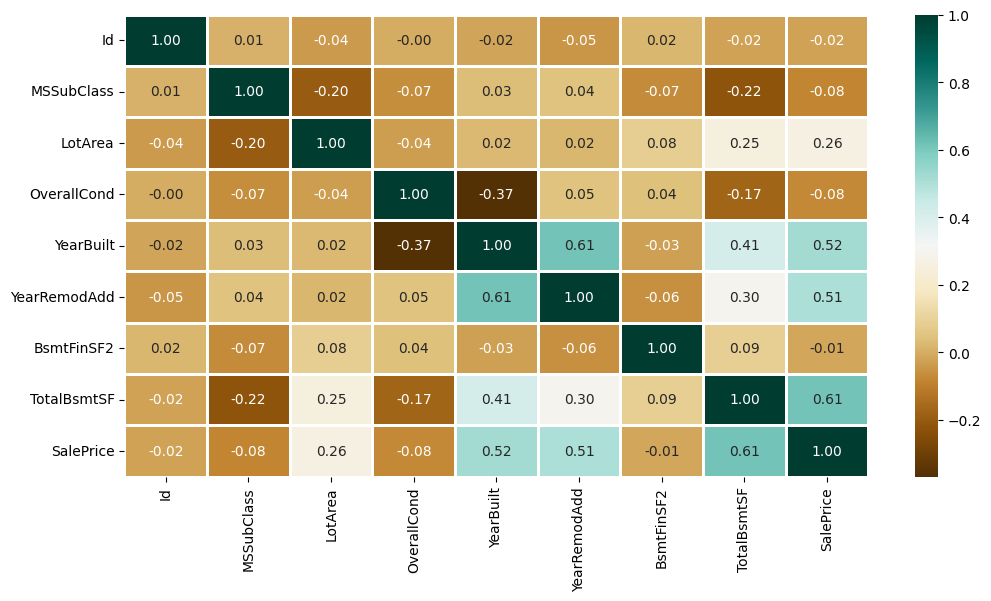

In [72]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataframe.select_dtypes(exclude=['object']).corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [73]:
unique_values = []
for col in obj_col:
  unique_values.append(dataframe[col].unique().size)
print(unique_values)

[6, 5, 5, 16]


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

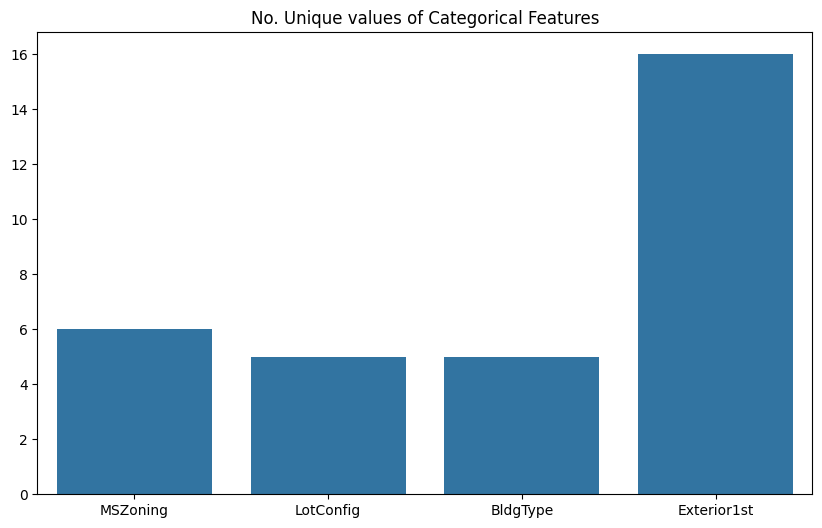

In [74]:
plt.figure(figsize=(10, 6))
plt.title('No. Unique values of Categorical Features')
sns.barplot(x=obj_col,y=unique_values)

<ipython-input-75-4178c3587ab8>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


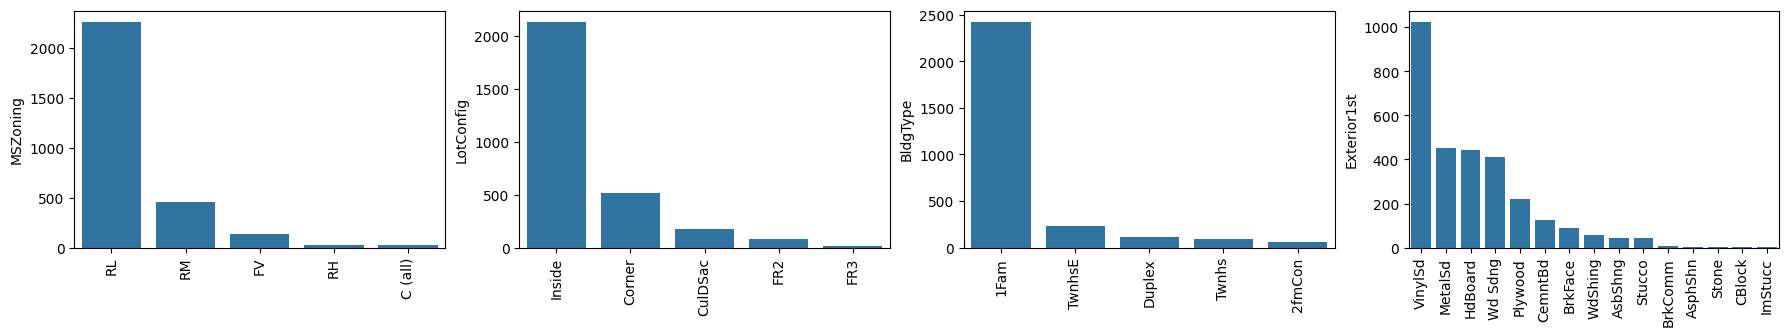

In [75]:
plt.figure(figsize=(22, 40))
plt.title('Categorical Features: Distribution')
index = 1

for col in obj_col:
  y = dataframe[col].value_counts()
  plt.subplot(11, 4, index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index += 1

In [76]:
dataframe.drop(['Id'], axis=1, inplace=True)

In [77]:
dataframe['SalePrice'] = dataframe['SalePrice'].fillna(
    dataframe['SalePrice'].mean()
)

In [78]:
dataframe.isnull().sum()

MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [79]:
dataframe = dataframe.dropna()

In [80]:
dataframe.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [81]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(sparse=False)


In [83]:
oh_cols = pd.DataFrame(oh_encoder.fit_transform(dataframe[obj_col]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [84]:
oh_cols.index = dataframe.index

In [85]:
oh_cols.columns = oh_encoder.get_feature_names_out()

In [86]:
df_final = dataframe.drop(obj_col, axis=1)

In [87]:
df_final = pd.concat([df_final, oh_cols], axis=1)

In [88]:
df_final.head(2)

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.75, test_size = 0.25, random_state=0
)

In [90]:
from sklearn import svm
from sklearn.metrics import mean_absolute_percentage_error

model_svr = svm.SVR()
model_svr.fit(x_train, y_train)
y_pred_svr = model_svr.predict(x_test)

print(mean_absolute_percentage_error(y_test, y_pred_svr))

0.18255631750762377


In [91]:
from sklearn.ensemble import RandomForestRegressor as RFR

model_rfr = RFR(n_estimators=10)
model_rfr.fit(x_train, y_train)
y_pred_rfr = model_rfr.predict(x_test)

print(mean_absolute_percentage_error(y_test, y_pred_rfr))

0.18687132225270076


In [92]:
from sklearn.linear_model import LinearRegression as LR

model_lr = LR()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)

print(mean_absolute_percentage_error(y_test, y_pred_lr))

0.1875660278206094
